In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [109]:
df = pd.read_csv('part-merged_1.csv')

In [110]:
df = df.dropna()

df.reset_index(drop=True, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406478 entries, 0 to 406477
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   StandardDateofBooking  406478 non-null  object 
 1   StandardDateofJourney  406478 non-null  object 
 2   Month_of_Journey       406478 non-null  int64  
 3   Airline_Company        406478 non-null  object 
 4   Flight_Number          406478 non-null  object 
 5   Flight_Class           406478 non-null  object 
 6   Departure_Time         406478 non-null  object 
 7   Departure_City         406478 non-null  object 
 8   Arrival_Time           406478 non-null  object 
 9   Arrival_City           406478 non-null  object 
 10  Duration_in_mins       406478 non-null  float64
 11  Total Stops            406478 non-null  object 
 12  Price                  406478 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 40.3+ MB


In [112]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

train.to_csv('train_data.csv', index=False)
test.to_csv('test_data.csv', index=False)

In [113]:
df = pd.read_csv('train_data.csv')

In [114]:
df["StandardDateofJourney"] = pd.to_datetime(df["StandardDateofJourney"])

In [115]:
df["Journey_Day"] = df["StandardDateofJourney"].dt.day

In [116]:
df["Journey_Month"] = df["StandardDateofJourney"].dt.month

In [117]:
df["Journey_DOW"] = df["StandardDateofJourney"].dt.dayofweek

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325182 entries, 0 to 325181
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   StandardDateofBooking  325182 non-null  object        
 1   StandardDateofJourney  325182 non-null  datetime64[ns]
 2   Month_of_Journey       325182 non-null  int64         
 3   Airline_Company        325182 non-null  object        
 4   Flight_Number          325182 non-null  object        
 5   Flight_Class           325182 non-null  object        
 6   Departure_Time         325182 non-null  object        
 7   Departure_City         325182 non-null  object        
 8   Arrival_Time           325182 non-null  object        
 9   Arrival_City           325182 non-null  object        
 10  Duration_in_mins       325182 non-null  float64       
 11  Total Stops            325182 non-null  object        
 12  Price                  325182 non-null  floa

In [119]:
df.drop("StandardDateofJourney",axis=1,inplace=True)

<Axes: xlabel='Journey_Month', ylabel='count'>

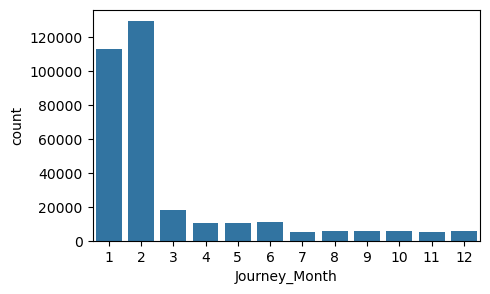

In [120]:
plt.figure(figsize=(5,3))
sns.countplot(x="Journey_Month", data=df)

<Axes: xlabel='Journey_DOW', ylabel='count'>

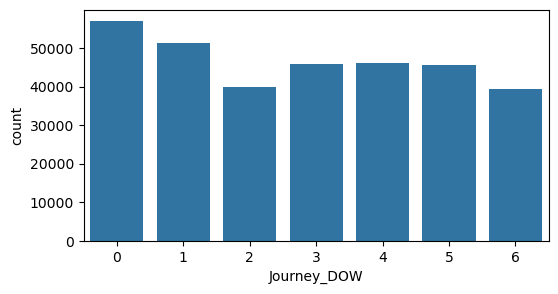

In [121]:
plt.figure(figsize=(6,3))
sns.countplot(x="Journey_DOW", data=df)

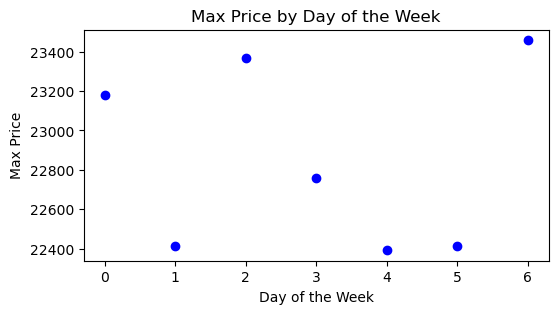

In [122]:
max_prices = df.groupby("Journey_DOW")["Price"].mean()
plt.figure(figsize=(6, 3))
plt.scatter(max_prices.index, max_prices.values, color='b', marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Max Price')
plt.title('Max Price by Day of the Week')
plt.show()

## Departure_Time

In [123]:
df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

/tmp/ipykernel_2119235/207793956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour


In [124]:
df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute

/tmp/ipykernel_2119235/2798108140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute


In [125]:
df.drop("Departure_Time",axis=1,inplace=True)

<Axes: xlabel='Dep_Hour', ylabel='Count'>

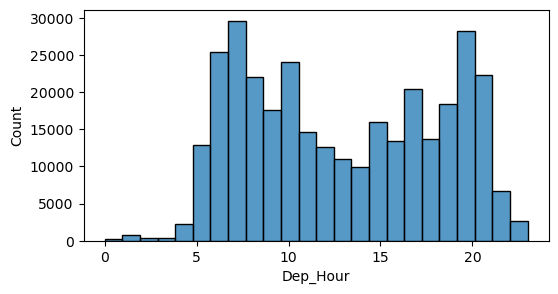

In [126]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Dep_Hour",bins=24)

## Arrival_Time

In [127]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

/tmp/ipykernel_2119235/1971985902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


In [128]:
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

/tmp/ipykernel_2119235/3257876746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [129]:
df.drop("Arrival_Time",axis=1,inplace=True)

<Axes: xlabel='Arrival_Hour', ylabel='Count'>

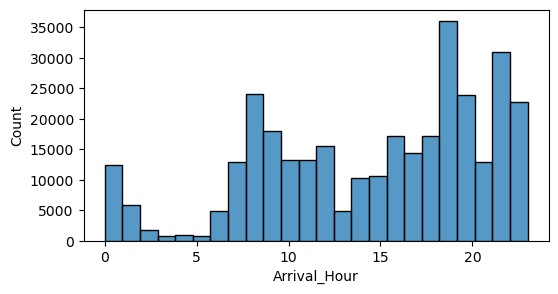

In [130]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Arrival_Hour",bins=24)

## Duration

<Axes: xlabel='Duration_in_mins', ylabel='Count'>

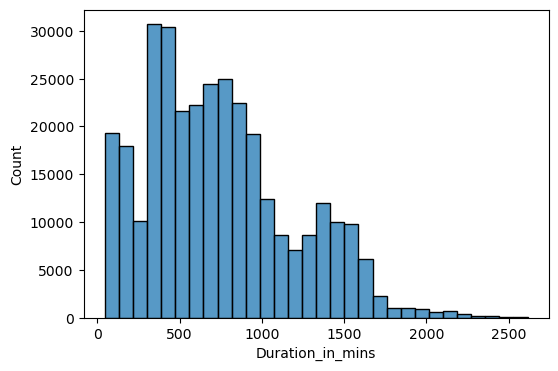

In [131]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Duration_in_mins",bins=30)

<Axes: xlabel='Duration_in_mins', ylabel='Price'>

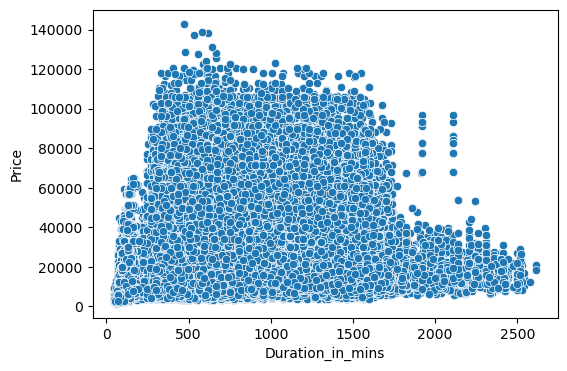

In [132]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Duration_in_mins", y="Price")

In [133]:
df['Total Stops'].value_counts()

Total Stops
1-stop                                          264156
non-stop                                         37093
2+-stop                                          22026
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           1050
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         217
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          204
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           203
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati        59
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR             57
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ             47
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai          33
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             30
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB              7
Name: count, dtype: int64

In [134]:
# Clean up variations of '1-stop'
df['Total Stops'] = df['Total Stops'].apply(lambda x: '1-stop' if x.strip().startswith('1-stop') else x)

# Check the result
print(df['Total Stops'].value_counts())

Total Stops
1-stop      266063
non-stop     37093
2+-stop      22026
Name: count, dtype: int64


In [135]:
df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,
                                                         "1-stop" : 1,
                                                         "2+-stop" : 2})

/tmp/ipykernel_2119235/1712726908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,


In [136]:
df.sample(20)

,StandardDateofBooking,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
134588,2023-01-15,1,Air India,AI-441,BUSINESS,Delhi,Bangalore,1035.0,1,42457.0,31,1,1,17,50,11,5
167161,2023-01-15,2,Vistara,UK-846,BUSINESS,Bangalore,Hyderabad,940.0,1,38180.0,3,2,4,8,25,0,5
300740,2023-01-15,1,GO FIRST,G8- 241,ECONOMY,Bangalore,Delhi,860.0,1,14574.0,29,1,6,16,25,6,45
173986,2023-01-15,2,Vistara,UK-772,BUSINESS,Kolkata,Ahmedabad,755.0,1,92547.0,28,2,1,10,20,22,55
315396,2023-01-15,5,Vistara,UK-706,BUSINESS,Delhi,Mumbai,1290.0,1,47665.0,2,5,1,13,45,11,15
76958,2023-01-15,1,Vistara,UK-930,ECONOMY,Mumbai,Bangalore,570.0,1,26523.0,22,1,6,7,30,17,0
281531,2023-01-15,2,Air India,AI-683,ECONOMY,Mumbai,Ahmedabad,790.0,2,11018.0,14,2,1,21,0,10,10
187434,2023-01-15,2,Vistara,UK-874,PREMIUMECONOMY,Hyderabad,Chennai,1465.0,1,10513.0,2,2,3,8,30,8,55
284110,2023-01-15,2,Vistara,UK-772,ECONOMY,Kolkata,Delhi,695.0,2,14750.0,25,2,5,10,20,21,55
297182,2023-01-15,1,Air India,AI-773,ECONOMY,Kolkata,Ahmedabad,1600.0,1,10112.0,31,1,1,17,15,19,55


<Axes: xlabel='Total Stops', ylabel='count'>

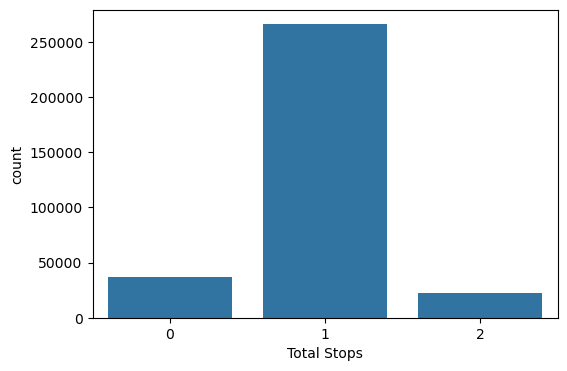

In [137]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total Stops", data=df)

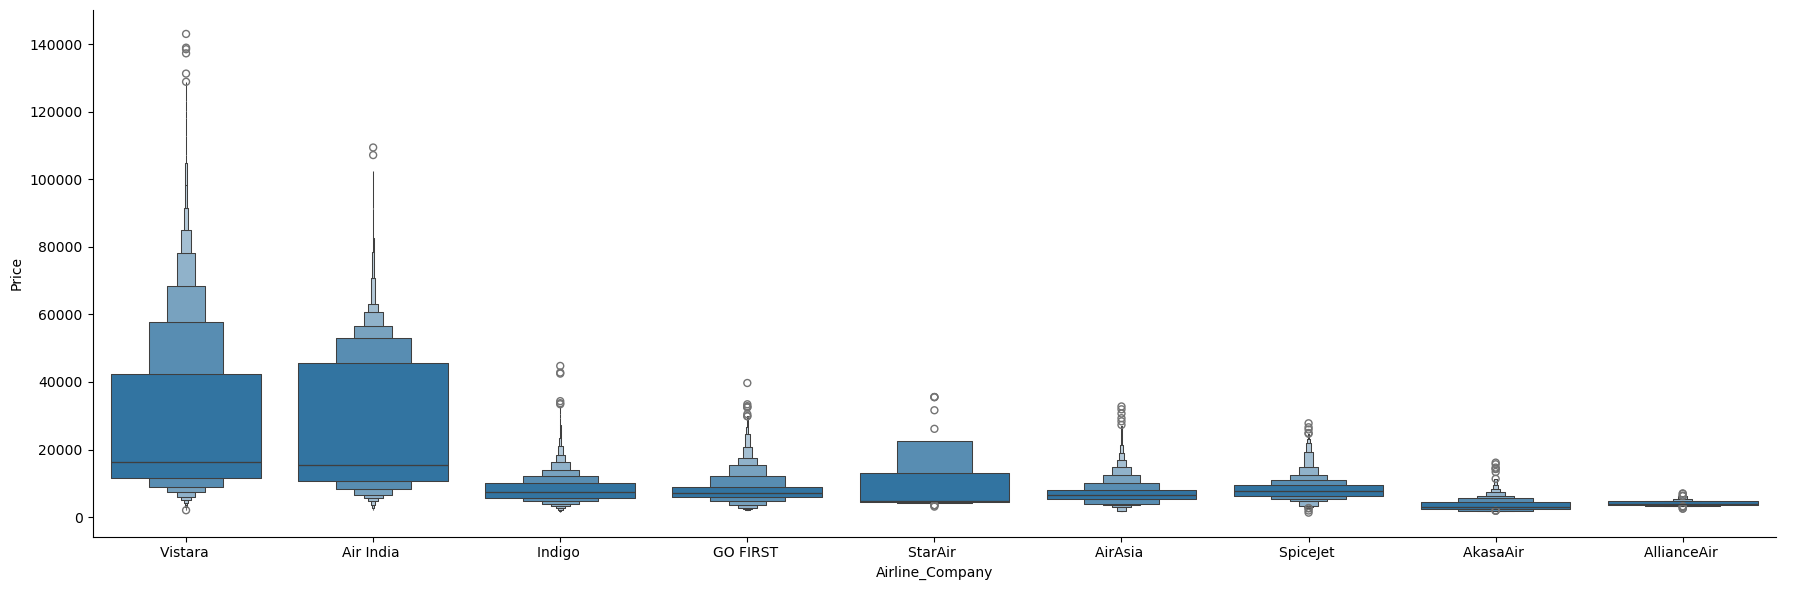

In [138]:
sns.catplot(y = "Price", x = "Airline_Company", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [139]:
df["Airline_Company"].value_counts()

Airline_Company
Vistara         166639
Air India        86212
Indigo           47045
AirAsia          11360
GO FIRST          7771
SpiceJet          4225
AkasaAir          1615
AllianceAir        275
StarAir             40
Name: count, dtype: int64

In [ ]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(10,10))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [140]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

# Fit and transform the data
encoded_features = ohe.fit_transform(df[['Airline_Company', 'Departure_City', 'Arrival_City']])

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Airline_Company', 'Departure_City', 'Arrival_City']))

# Concatenate the original DataFrame (excluding the original columns) with the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=['Airline_Company', 'Departure_City', 'Arrival_City']), encoded_df], axis=1)

df = df_encoded.copy()

In [141]:
df.head()

,StandardDateofBooking,Month_of_Journey,Flight_Number,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Journey_DOW,...,Departure_City_Delhi,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai
0,2023-01-15,3,UK-979,BUSINESS,575.0,2,45817.0,2,3,3,...,1,0,0,0,0,1,0,0,0,0
1,2023-01-15,4,UK-858,ECONOMY,855.0,1,9028.0,2,4,6,...,0,0,0,0,0,0,0,1,0,0
2,2023-01-15,1,UK-858,PREMIUMECONOMY,1035.0,1,13635.0,25,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2023-01-15,5,AI-574,ECONOMY,900.0,1,9634.0,2,5,1,...,0,0,0,0,0,0,1,0,0,0
4,2023-01-15,1,UK-926,BUSINESS,1600.0,1,57827.0,26,1,3,...,0,0,0,0,0,0,0,1,0,0


In [142]:
df = df.drop(['StandardDateofBooking', 'Flight_Number'], axis=1)

In [143]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

encoder = OrdinalEncoder(categories=[['ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']])

df['Flight_Class_Encoded'] = encoder.fit_transform(df[['Flight_Class']])

df.head()

,Month_of_Journey,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Journey_DOW,Dep_Hour,Dep_Minute,...,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Flight_Class_Encoded
0,3,BUSINESS,575.0,2,45817.0,2,3,3,13,25,...,0,0,0,0,1,0,0,0,0,2.0
1,4,ECONOMY,855.0,1,9028.0,2,4,6,6,40,...,0,0,0,0,0,0,1,0,0,0.0
2,1,PREMIUMECONOMY,1035.0,1,13635.0,25,1,2,6,40,...,0,0,0,0,0,0,0,0,0,1.0
3,5,ECONOMY,900.0,1,9634.0,2,5,1,21,15,...,0,0,0,0,0,1,0,0,0,0.0
4,1,BUSINESS,1600.0,1,57827.0,26,1,3,6,45,...,0,0,0,0,0,0,1,0,0,2.0


In [144]:
df = df.drop(['Flight_Class'], axis=1)

<Axes: >

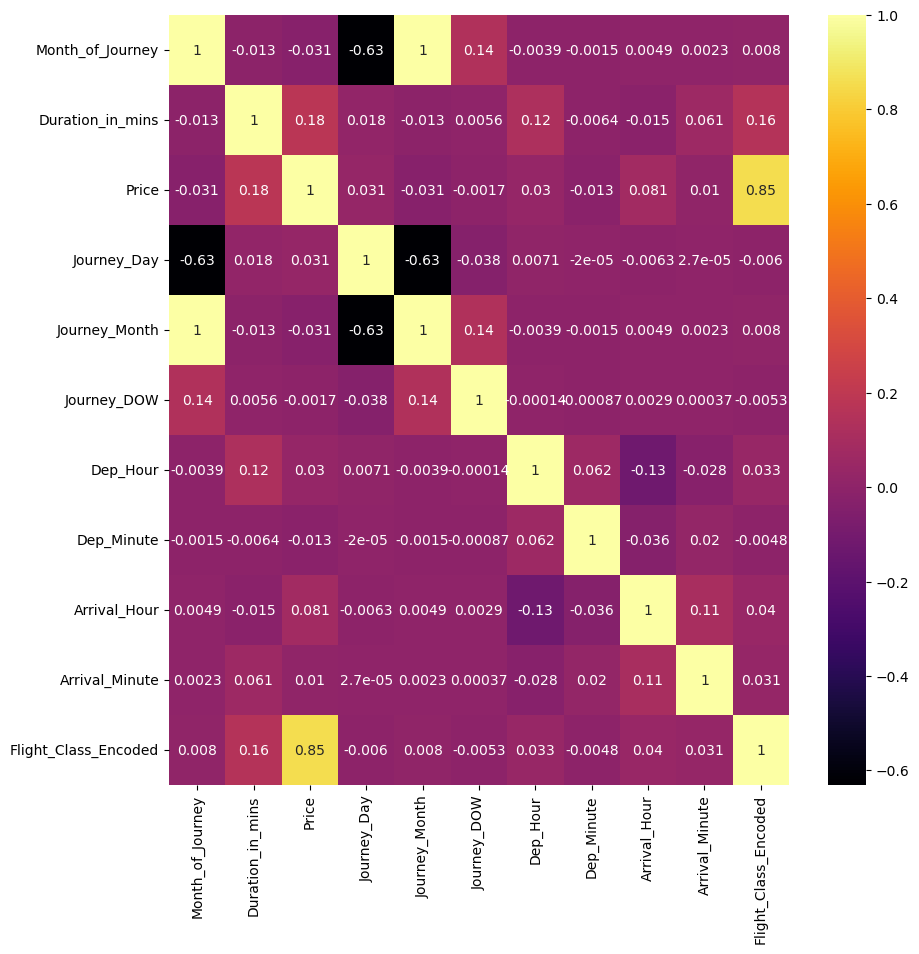

In [145]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(10,10))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [146]:
df.to_csv('final_transformed_train_data.csv')

## Model Implementation

In [20]:
import pandas as pd

# Load the transformed train and test data
train_df = pd.read_csv('final_transformed_train_data.csv')
test_df = pd.read_csv('final_transformed_test_data.csv')

# Ensure no index column
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Separate features and target
X_train = train_df.drop(['Price'], axis=1)
y_train = train_df['Price']

X_test = test_df.drop(['Price'], axis=1)
y_test = test_df['Price']


In [24]:
X_test = X_test.drop(['index', 'Month_of_Journey'], axis=1)
X_train = X_train.drop(['index', 'Month_of_Journey'], axis=1)

KeyError: "['index', 'Month_of_Journey'] not found in axis"

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pickle

# Assuming your data is already split into X_train, X_test, y_train, y_test

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2: {test_r2}")
    print("-" * 30)

# Initialize models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# List of models with variable names
models = [
    linear_reg_model,
    decision_tree_model,
    random_forest_model,
    gradient_boosting_model,
    xgb_model
]

# Train and evaluate each model
for model in models:
    train_evaluate_model(model, X_train, y_train, X_test, y_test)

# Save models to .pkl files
# with open('linear_reg_model.pkl', 'wb') as file:
#     pickle.dump(linear_reg_model, file)
# with open('decision_tree_model.pkl', 'wb') as file:
#     pickle.dump(decision_tree_model, file)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
# with open('gradient_boosting_model.pkl', 'wb') as file:
#     pickle.dump(gradient_boosting_model, file)
# with open('xgb_model.pkl', 'wb') as file:
#     pickle.dump(xgb_model, file)


Model: LinearRegression
Train MSE: 99566078.3176293
Test MSE: 99612741.80523874
Train R2: 0.7587335059252355
Test R2: 0.7590733128679394
------------------------------
Model: DecisionTreeRegressor
Train MSE: 173718.01308799678
Test MSE: 28844165.457042973
Train R2: 0.9995790500471288
Test R2: 0.9302365430293887
------------------------------
Model: RandomForestRegressor
Train MSE: 2236383.6912143086
Test MSE: 15097833.15186028
Train R2: 0.9945808405663626
Test R2: 0.9634838790878558
------------------------------
Model: GradientBoostingRegressor
Train MSE: 42769932.94010998
Test MSE: 42611034.15379967
Train R2: 0.896360769183313
Test R2: 0.8969395369719044
------------------------------
Model: XGBRegressor
Train MSE: 23013585.34538646
Test MSE: 23830930.0626294
Train R2: 0.944233948487367
Test R2: 0.9423617207275468
------------------------------


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations and limited parallel jobs
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=2)

# Fit the model using a subset of the data
subset_size = int(0.1 * X_train.shape[0])  # Use 10% of the data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

rf_random.fit(X_train_subset, y_train_subset)

# Print the best parameters and best score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tot

/home/growlt257/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_

/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
57 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score: 0.9238127585279843


In [5]:
# Get the best parameters
best_params = rf_random.best_params_

# Train the Random Forest with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R2:", r2)


Test MSE: 17367464.101665493
Test R2: 0.957994474260328


Random Forest Score on Training set is 0.9652992440396188
Random Forest Score on Test Set is 0.9507849503968134
[0.95031844 0.94920149 0.95131603 0.94981386 0.94993662 0.95108402
 0.94832263 0.95003153 0.94930766 0.94892171]
Accuracy: 94.98 %
Standard Deviation: 0.09 %
Mean Absolute Error: 2494.6248348984027
Mean Squared Error: 20348289.711745504
RMSE: 4510.907858928788
The r2_score is 0.9507849503968134


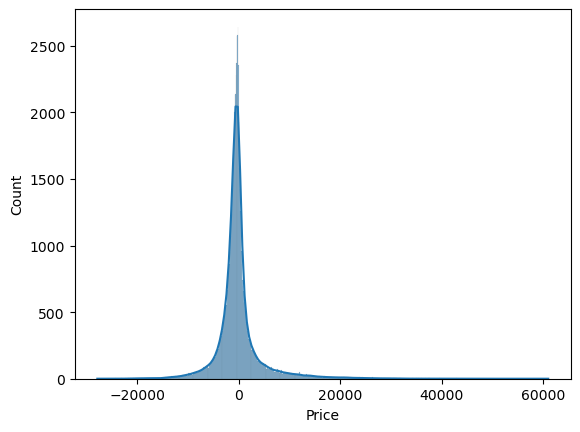

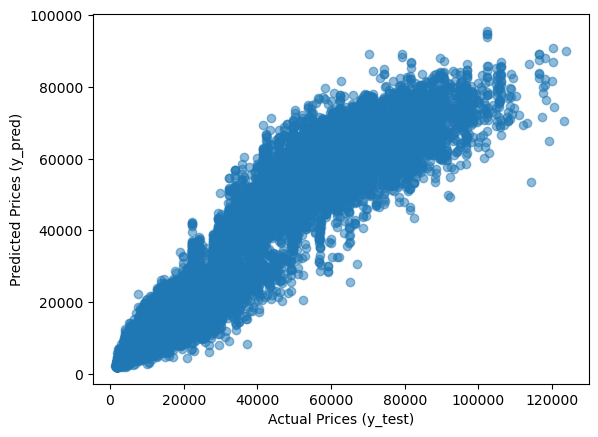

In [6]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined
# Create the kfold object for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest Regressor with corrected max_features parameter
rf_reg = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=15,
    min_samples_leaf=2,
    max_features='sqrt',  # Changed from 'auto' to 'sqrt'
    max_depth=30
)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Training and testing accuracy
print("Random Forest Score on Training set is", rf_reg.score(X_train, y_train))
print("Random Forest Score on Test Set is", rf_reg.score(X_test, y_test))

# Cross-validation accuracy
accuracies = cross_val_score(rf_reg, X_train, y_train, cv=kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('The r2_score is', r2)

r2_rf = r2_score(y_test, y_pred)

# Distribution plot of residuals
sns.histplot(y_test - y_pred, kde=True)
plt.show()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.show()


In [25]:
#random forest prediction 
y_pred = rf_reg.predict(X_test)
y_pred.to_csv('removing_null_then_prediction_rf.csv')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Month_of_Journey
- Unnamed: 0


In [11]:
import pickle

with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

In [12]:
import joblib
import pandas as pd

# Assume df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading your data

# Here we use a sample DataFrame with column names for demonstration purposes
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'Month_of_Journey': [],
    'Duration_in_mins': [],
    'Total Stops': [],
    'Journey_Day': [],
    'Journey_Month': [],
    'Journey_DOW': [],
    'Dep_Hour': [],
    'Dep_Minute': [],
    'Arrival_Hour': [],
    'Arrival_Minute': [],
    'Airline_Company_AirAsia': [],
    'Airline_Company_AkasaAir': [],
    'Airline_Company_AllianceAir': [],
    'Airline_Company_GO FIRST': [],
    'Airline_Company_Indigo': [],
    'Airline_Company_SpiceJet': [],
    'Airline_Company_StarAir': [],
    'Airline_Company_Vistara': [],
    'Departure_City_Bangalore': [],
    'Departure_City_Chennai': [],
    'Departure_City_Delhi': [],
    'Departure_City_Hyderabad': [],
    'Departure_City_Kolkata': [],
    'Departure_City_Mumbai': [],
    'Arrival_City_Bangalore': [],
    'Arrival_City_Chennai': [],
    'Arrival_City_Delhi': [],
    'Arrival_City_Hyderabad': [],
    'Arrival_City_Kolkata': [],
    'Arrival_City_Mumbai': [],
    'Flight_Class_Encoded': []
})

# Get the column names
column_names = df.columns.tolist()

# Save the column names as a .pkl file
joblib.dump(column_names, 'column_names.pkl')

print("Column names have been saved to 'column_names.pkl'")


Column names have been saved to 'column_names.pkl'


In [ ]:
# Reindex the input DataFrame to match the training feature names
input_df = df.reindex(columns=training_feature_names, fill_value=0)

# Make the prediction
prediction = model.predict(input_df)


In [8]:
import pandas as pd
manual_test  = pd.read_csv('manual_test_data.csv')
X_test = manual_test
y_pred = rf_reg.predict(X_test)


In [10]:
import pandas as pd

y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])

y_pred_df.to_csv('manual_test_data_output.csv', index=False)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
xgbreg = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth = 10,min_child_weight =2,
                     colsample_bytree=0.9,gamma=0.01)

In [ ]:
param_grid = {
    'n_estimators': [550],
    'learning_rate': [0.01],
    'max_depth': [10],
    'min_child_weight': [2],
    'colsample_bytree': [0.9],
    'gamma': [0.01]
}

In [ ]:
grid_CV = GridSearchCV(estimator=xgbreg, param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [ ]:
grid_CV.fit(X_train,y_train)import pyodbc
import pandas as pd

# Define the connection string
server = 'your_server.database.windows.net'
database = 'your_database'
username = 'your_username'
password = 'your_password'
driver = '{ODBC Driver 17 for SQL Server}'

# Establish the connection
conn = pyodbc.connect('DRIVER=' + driver + ';SERVER=' + server + ';PORT=1433;DATABASE=' + database + ';UID=' + username + ';PWD=' + password)

# Define your SQL query
query = "SELECT * FROM your_table"

# Fetch the data into a Pandas DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.9,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.01,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=2, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9], 'gamma': [0.01],
                         'learning_rate': [0.01], 'max_depth': [10],
                         'min_child_weight': [2], 'n_estimators': [550]},
             verbose=1)

In [ ]:
grid_CV.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.01,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 550}

In [ ]:
y_pred = grid_CV.predict(X_test)

In [ ]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R^2 Score: {r2_score(y_test,y_pred):.4f}")

MAE: 2391.0875
MSE: 16627816.3220
RMSE: 4077.7220
R^2 Score: 0.9599
